In [14]:
# Import the required modules and libraries:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from PIL import Image

import matplotlib.pyplot as plt

In [10]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
pathBusPersonCar = "/content/drive/MyDrive/5_Cisc442_CompVision/PR2/business_transit_1148837611.jpg.webp"
pathCowHorseSheep = "/content/drive/MyDrive/5_Cisc442_CompVision/PR2/cow-horse-sheep-grazing-on-grass-farm-field-maine-keith-webber-jr.jpg"
pathDogPlantChair = "/content/drive/MyDrive/5_Cisc442_CompVision/PR2/curious-jack-russell-terrier-reaches-potted-plant-chair-mess-house-kitchen_86824-1458.jpg"
pathPlanePersonBike = "/content/drive/MyDrive/5_Cisc442_CompVision/PR2/d9826072-14c6-11ea-9462-4dd25a5b0420_image_hires_135133.webp"
pathCarMotorcyclePerson = "/content/drive/MyDrive/5_Cisc442_CompVision/PR2/wp2406637.jpg.webp"


In [13]:

BusPersonCarImg = Image.open(pathBusPersonCar)
CowHorseSheepImg = Image.open(pathCowHorseSheep)
DogPlantChairImg = Image.open(pathDogPlantChair)
PlanePersonBikeImg = Image.open(pathPlanePersonBike)
CarMotorcyclePersonImg = Image.open(pathCarMotorcyclePerson)

imgArray = [BusPersonCarImg, CowHorseSheepImg, DogPlantChairImg, PlanePersonBikeImg, CarMotorcyclePersonImg]

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

inputTensors = []
inputBatches = []
outputs = []
outputPredictions = []

for i in range(5):
  imgArray[i] = imgArray[i].convert("RGB")
  inputTensors.append(preprocess(imgArray[i]))
  inputBatches.append(inputTensors[i].unsqueeze(0)) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      inputBatches[i] = inputBatches[i].to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(inputBatches[i])['out'][0]
      outputs.append(output)
  outputPredictions.append(output.argmax(0))

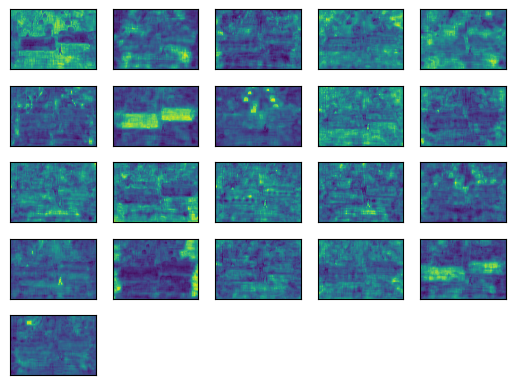

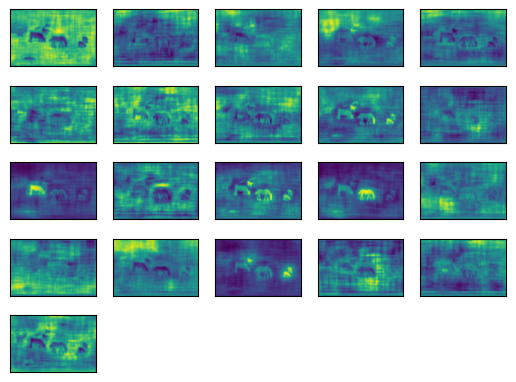

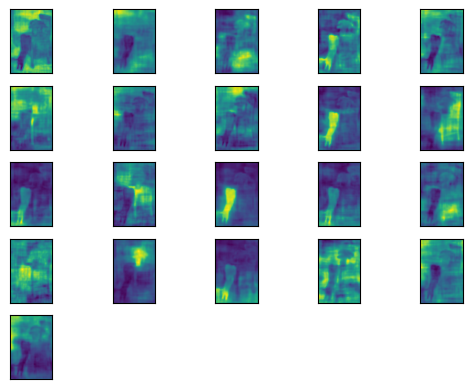

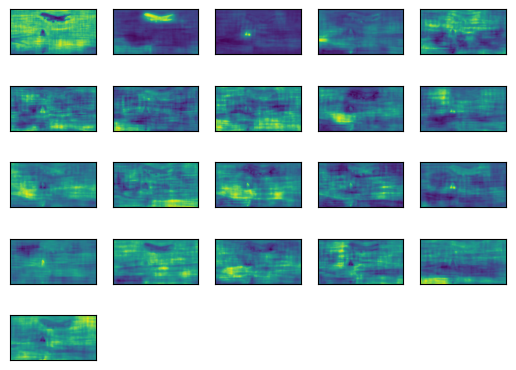

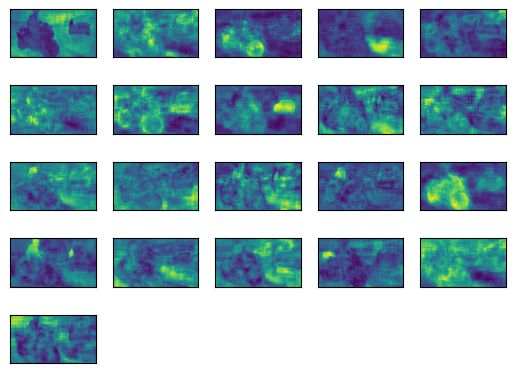

In [19]:

for i in range(5):
  square = 5
  ix = 1
  col = 0
  for _ in range(square):
    for _ in range(square):
      # specify subplot and turn of axis
      if (col > 20):
        break
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(outputs[i][col].cpu().numpy())
      ix += 1
      col += 1
    # show the figure

  pathResults = "/content/drive/MyDrive/5_Cisc442_CompVision/PR2/Results" + "/imageResults" + str(i+1)
  plt.savefig(pathResults)
  plt.show()

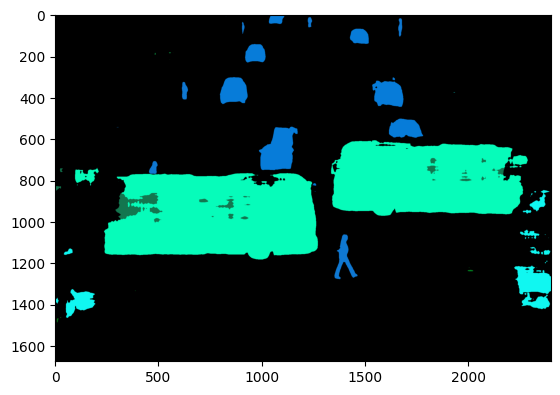

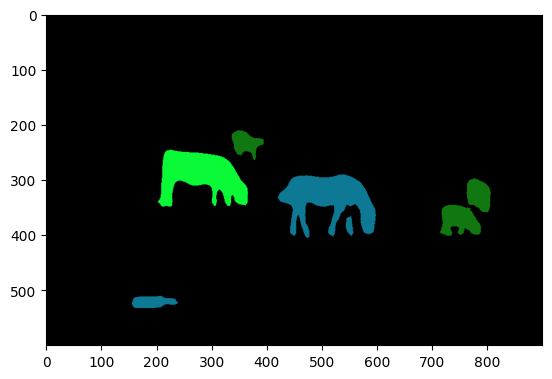

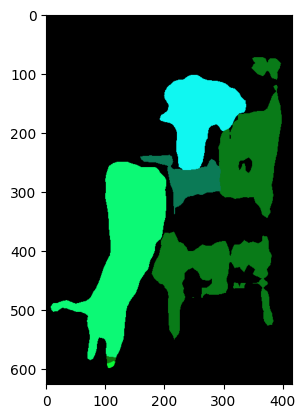

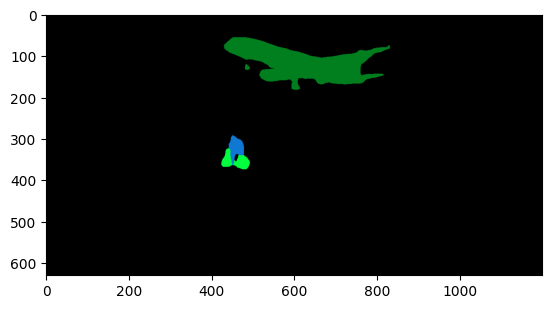

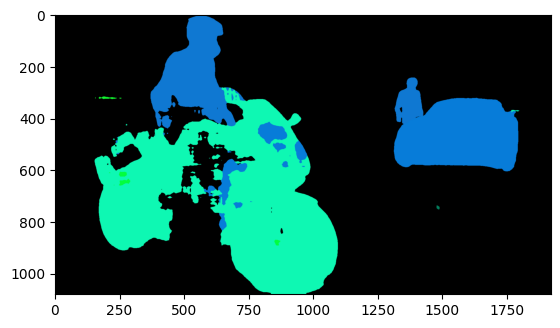

In [21]:
for i in range(5):

  # create a color pallette, selecting a color for each class
  palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
  colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
  colors = (colors % 255).numpy().astype("uint8")

  # plot the semantic segmentation predictions of 21 classes in each color
  r = Image.fromarray(outputPredictions[i].byte().cpu().numpy()).resize(imgArray[i].size)
  r.putpalette(colors)

  plt.imshow(r)

  pathResultsSegmentation = "/content/drive/MyDrive/5_Cisc442_CompVision/PR2/Results" + "/imageSegmentation" + str(i+1)
  plt.savefig(pathResultsSegmentation)

  plt.show()